### **ANN Project**

### What is a Convolutional Neural Network (CNN)?

- **Definition**: A CNN is a type of deep neural network that is primarily used for analyzing visual imagery. It's particularly well-suited for tasks like image classification, object detection, and image segmentation.
  
- **Inspiration**: CNNs are inspired by the organization of the animal visual cortex, where individual neurons respond to stimuli only in a restricted region of the visual field known as the receptive field.

- **Architecture**: CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. These layers are designed to automatically and adaptively learn spatial hierarchies of features from input images.

### Key Components of CNNs:

1. **Convolutional Layers**:
   - These layers apply convolution operations to the input data using learnable filters (kernels). Each filter extracts certain features from the input data, such as edges, textures, or patterns.
   - Convolutional layers preserve the spatial relationship between pixels by learning image features using small squares of input data.

2. **Pooling Layers**:
   - Pooling layers downsample the feature maps generated by convolutional layers, reducing the dimensionality of the data and the number of parameters in the network.
   - Common pooling operations include max pooling and average pooling, which select the maximum or average value from a region of the input.

3. **Activation Functions**:
   - Activation functions introduce non-linearity into the network, allowing it to learn complex patterns in the data.
   - Common activation functions used in CNNs include ReLU (Rectified Linear Unit), sigmoid, and tanh.

4. **Fully Connected Layers**:
   - Fully connected layers are traditional neural network layers where each neuron is connected to every neuron in the previous layer.
   - These layers are typically found at the end of the network and are responsible for making predictions based on the features learned by the convolutional layers.

### Applications of CNNs:

- **Image Classification**: Identifying the category or class of an image (e.g., cat, dog, airplane).
  
- **Object Detection**: Identifying and locating objects within images, often by drawing bounding boxes around them.
  
- **Image Segmentation**: Partitioning an image into multiple segments or regions based on certain characteristics.
  
- **Facial Recognition**: Recognizing and identifying faces within images or video streams.
  
- **Medical Image Analysis**: Analyzing medical images such as X-rays, MRIs, and CT scans for diagnosis and treatment planning.

CNNs have revolutionized the field of computer vision and have become a fundamental tool for various applications in image analysis and understanding. They continue to evolve with advancements in deep learning and are increasingly being applied to new domains and tasks.

- **NumPy (np)**: For numerical computing and handling multi-dimensional arrays efficiently.
- **TensorFlow (tf)**: For building, training, and deploying machine learning models, including deep neural networks.
- **TensorFlow.keras**: TensorFlow's high-level API for building and training neural networks, providing a user-friendly interface.
- **MobileNet**: A lightweight deep learning model architecture suitable for mobile and embedded devices.
- **ImageDataGenerator**: A utility in Keras for generating augmented image data during model training.
- **Dense**: A Keras layer for fully connected neural network layers.
- **GlobalAveragePooling2D**: A Keras layer for global average pooling over spatial dimensions of the input data.
- **Model**: A Keras class for defining neural network models using the functional API.
- **cifar10**: A dataset module in Keras providing access to the CIFAR-10 dataset for image classification tasks.
- **EarlyStopping**: A Keras callback that stops training when a monitored metric stops improving to prevent overfitting.
- **ReduceLROnPlateau**: A Keras callback that reduces the learning rate when a monitored metric stops improving, aiding model convergence.

These libraries collectively facilitate building and training a CNN-based object detection model using MobileNet architecture on the CIFAR-10 dataset with data augmentation and regularization techniques.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

- **Constants Definition**: Constants such as image size (`IMG_SIZE`), batch size (`BATCH_SIZE`), number of classes (`NUM_CLASSES`), number of epochs (`NUM_EPOCHS`), steps per epoch (`STEPS_PER_EPOCH`), and validation steps (`VALIDATION_STEPS`) are defined. These constants are used throughout the code to maintain consistency and facilitate easy parameter adjustments.

- **CIFAR-10 Dataset Loading**: The CIFAR-10 dataset is loaded using the `cifar10.load_data()` function. This dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. The pixel values of the images are normalized to the range [0, 1].

- **Data Augmentation**: Data augmentation techniques such as rotation, width and height shifting, shear, zoom, and horizontal flip are applied to the training set using the `ImageDataGenerator` class from Keras. Data augmentation helps increase the diversity of training examples and improve the model's generalization ability.

- **Model Definition**: The MobileNet model pre-trained on ImageNet is loaded without the top (fully connected) layers. Custom top layers, including global average pooling and dense layers, are added to the model for object detection. The model architecture is then defined using the Keras `Model` class.

- **Freezing Pre-trained Layers**: Most of the pre-trained layers in MobileNet are frozen (non-trainable) except for the last 10 layers. This prevents the pre-trained weights from being updated during training, except for the fine-tuning of the last few layers.

- **Model Compilation**: The model is compiled using the Adam optimizer with a lower learning rate (`lr=0.0001`). Categorical cross-entropy is used as the loss function, and accuracy is chosen as the evaluation metric.

- **Callbacks Implementation**: Callbacks for early stopping and learning rate reduction are implemented to monitor the validation loss during training. Early stopping helps prevent overfitting, while reducing the learning rate can aid in fine-tuning the model.

- **Model Training**: The model is trained using the `fit()` method with the training and validation data generators. The training stops early if the validation loss doesn't improve for a specified number of epochs, and the learning rate is reduced if the validation loss doesn't improve for a certain number of epochs.

- **Model Saving**: Finally, the trained model is saved as an HDF5 file with the filename "object_detection_model_cifar10.h5" for future use.

This code essentially implements a CNN-based object detection model using transfer learning with MobileNet architecture on the CIFAR-10 dataset, with data augmentation and regularization techniques applied during training.

In [ ]:

# Define constants
IMG_SIZE = 32  # CIFAR-10 images are 32x32
BATCH_SIZE = 32
NUM_CLASSES = 10  # CIFAR-10 has 10 classes
NUM_EPOCHS = 40  # Increase the number of epochs
STEPS_PER_EPOCH = x_train.shape[0] // BATCH_SIZE
VALIDATION_STEPS = x_test.shape[0] // BATCH_SIZE

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define data generators with additional data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Increase rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation only on the training set
train_generator = train_datagen.flow(x_train, tf.keras.utils.to_categorical(y_train, NUM_CLASSES), batch_size=BATCH_SIZE)

validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow(x_test, tf.keras.utils.to_categorical(y_test, NUM_CLASSES), batch_size=BATCH_SIZE)

# Load pre-trained MobileNet model without top (fully connected) layers
base_model = MobileNet(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers for object detection
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Combine base model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers except the last few
for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('object_detection_model_cifar10.h5')


Epoch 1/40
1562/1562 [==============================] - 275s 174ms/step - loss: 1.5104 - accuracy: 0.4718 - val_loss: 1.1787 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 2/40
1562/1562 [==============================] - 270s 173ms/step - loss: 1.3422 - accuracy: 0.5257 - val_loss: 1.1185 - val_accuracy: 0.6093 - lr: 0.0010
Epoch 3/40
1562/1562 [==============================] - 271s 174ms/step - loss: 1.2814 - accuracy: 0.5498 - val_loss: 1.1111 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 4/40
1562/1562 [==============================] - 268s 171ms/step - loss: 1.2488 - accuracy: 0.5608 - val_loss: 1.0550 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 5/40
1562/1562 [==============================] - 267s 171ms/step - loss: 1.2276 - accuracy: 0.5712 - val_loss: 1.1379 - val_accuracy: 0.6038 - lr: 0.0010
Epoch 6/40
1562/1562 [==============================] - 272s 174ms/step - loss: 1.2132 - accuracy: 0.5753 - val_loss: 1.1961 - val_accuracy: 0.5968 - lr: 0.0010
Epoch 7/40
1562/1562 [============


1. **Define CIFAR-10 Class Labels**: An array `class_labels` is defined, containing the labels corresponding to the 10 classes in the CIFAR-10 dataset, such as 'airplane', 'automobile', 'bird', etc.

2. **Make Predictions**: The trained model is used to make predictions on the test set (`x_test`), and the results are stored in the variable `predictions`. This step likely involves using the `model.predict()` function.

3. **Print Predictions**: The predictions made by the model are printed to the console.

4. **Convert Predictions to Class Labels**: Using `np.argmax()`, the class probabilities predicted by the model are converted to their corresponding class labels. The resulting array is stored in `predicted_classes`.

5. **Visualize Predictions**: A grid of 3x3 images is created, showing a selection of images from the test set along with their predicted and true labels. This visualization helps in understanding how well the model performs on individual examples.


313/313 [==============================] - 12s 35ms/step
[[2.02924968e-03 1.07887918e-02 1.02238078e-03 ... 3.31923668e-03
  7.03636650e-03 7.14766048e-03]
 [9.72474739e-03 2.97563076e-01 3.53904150e-04 ... 1.00702535e-04
  6.74222231e-01 1.69389639e-02]
 [1.71494871e-01 2.56870359e-01 4.68126452e-03 ... 5.68992831e-03
  4.18918937e-01 1.26261249e-01]
 ...
 [4.74746912e-06 3.78509394e-05 3.38968751e-03 ... 1.89432106e-03
  3.31671326e-05 1.10006855e-04]
 [1.61938611e-02 8.90883386e-01 3.30873905e-03 ... 3.30459996e-04
  2.23700982e-03 2.50646640e-02]
 [3.40235507e-04 2.90590106e-04 2.12367435e-04 ... 7.94344366e-01
  1.10706125e-04 4.65752062e-04]]
[5 8 8 ... 5 1 7]


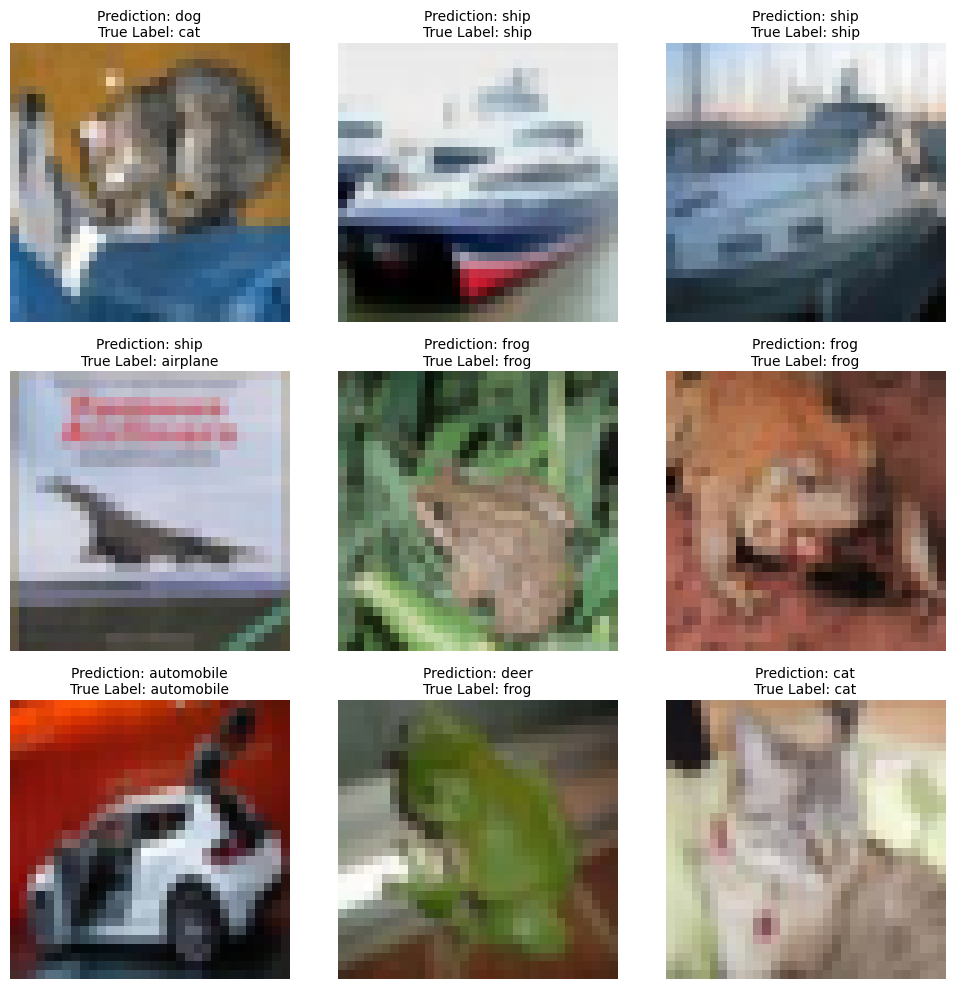

In [ ]:
# Define CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions
predictions = model.predict(x_test, verbose=1)

# Print predictions
print(predictions)

# Use np.argmax() to convert class probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)

# Create a grid of 3x3 images with predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Prediction: {class_labels[predicted_classes[i]]}\nTrue Label: {class_labels[y_test[i][0]]}", fontsize=10, pad=5)
    plt.axis('off')
plt.tight_layout()
plt.show()


**AUC-PRC**

The micro-average Area Under the Precision-Recall Curve (AUC-PRC) is a single metric that summarizes the overall performance of a multi-class classification model across all classes. It is calculated by considering all true positive and false positive predictions across all classes.

Here's how you can interpret the micro-average AUC-PRC:

- **Range**: The AUC-PRC value ranges from 0 to 1, where a higher value indicates better performance.
- **Interpretation**:
  - A value close to 1 indicates excellent performance, where the model achieves high precision and high recall across all classes.
  - A value around 0.5 suggests that the model's performance is no better than random guessing.
  - A value below 0.5 indicates poor performance, where the model performs worse than random guessing.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate micro-average AUC-PRC
average_precision["micro"] = average_precision_score(y_test, predictions, multi_class="ovr")

# Print micro-average metrics (no separate recall or precision for this option)
print("AUC-PRC (micro): {:.2f}".format(average_precision["micro"]))


AUC-PRC (micro): 0.96


In [ ]:
import pandas as pd

# Sample data with duplicates
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David'],
        'Age': [25, 30, 22, 25, 32]}
df = pd.DataFrame(data)

# Check for duplicates
duplicates = df.duplicated()
print(duplicates)  # Output: [False  True  False  True  False]

# Remove duplicates (keeping first occurrence)
df.drop_duplicates(inplace=True)
print(df)  # Output:   Name  Age
#          0  Alice   25
#          2  Charlie   22
#          4    David   32


0    False
1    False
2    False
3     True
4    False
dtype: bool
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
4    David   32
